# Машинное обучение с помощью Scikit learn
В данном разделе мы рассмотрим практический пример использования линейной регрессии с помощью библиотеки <a href='http://scikit-learn.org/stable/index.html'>Scikit learn</a>. Scikit learn (коротко sklearn) предоставляет унифицированный программный интерфейс для различных алгоритмов машинного обучения. Для обучения модели данные разбиваются на две части. Первая часть называется обучающей выборкой (training set), вторая тестовой (test set). Обучающая выборка используется для обучения модели. После получения обученной модели её качество тестируется на тестовой выборке. 

В sklearn все модели машинного обучения с учителем реализуют следующие функции:

|Функция                    | Описание                                                        |
|---------------------------|-----------------------------------------------------------------|
| `model.fit()`             | Обучает модель по данной обучающей выборке                      |
| `model.predict()`         | Предсказывает значение целевой переменной на основе новых данных|
| `model.predict_proba()`   | Предсказывает вероятность классификации                         |
| `model.score()`           | Оценка качества модели. Для задач регрессии возвращает <a href='https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D0%B4%D0%B5%D1%82%D0%B5%D1%80%D0%BC%D0%B8%D0%BD%D0%B0%D1%86%D0%B8%D0%B8'>коэффициент детерминации</a> (R<sup>2</sup>)
| `model.score()`           | Оценка качества модели. Для задач классификации возвращает <a href='https://en.wikipedia.org/wiki/Accuracy_and_precision'>точность (accuracy)</a> классификации|

Мы будем использовать эти функции для обучения, предсказания и оценки модели. 

## Данные для обучения
Для обучения нам нужно использовать какой нибудь набор данных. Для наглядности мы будем использовать синтетические данные, которые сами сгенерируем.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
x = np.linspace(-3, 3, 100)
rng = np.random.RandomState(0)
y = np.sin(4 * x) + x + rng.uniform(size=len(x))
x.shape, y.shape

((100,), (100,))

Наши данные выглядят следующим образом

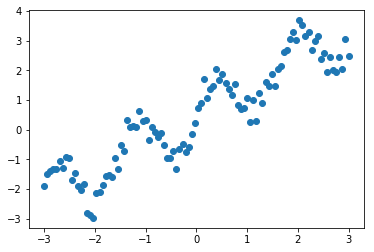

In [3]:
plt.plot(x, y, 'o');

В нашем примере данные `x` являются одномерными, так как мы сгенерировали данные только с одной колонкой. Но для линейной регрессии данные нужны в матричном виде. Поэтому мы из `x` сделаем матрицу с помощью функции `np.reshape`, чтобы получить матрицу размером (100 x 1)

In [4]:
print('Before: ', x.shape)
X = x.reshape(-1, 1)
print('After: ', X.shape)

Before:  (100,)
After:  (100, 1)


Как было сказано в начале, данные необходимо разбить на обучающиую и тестовую выборку:
<img src="img/train_test_split_matrix.svg" width="100%">

Для этого мы будем использовать функцию `train_test_split` из модуля `sklearn.model_selection`, которая разбивает набор данных в заданной пропорции (в нашем случае 75% обучающих и 25% тестовых данных). Обратите ткже внимание на то, что мы зафиксировали random_state, разбить данные в члучайном порядке, но при этом последующие разбиения будут давать такой же результат. Это важно, чтобы при обучении результаты были совместимы при последующих запусках

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [6]:
print('X_train.shape: ', X_train.shape)
print('X_test.shape:  ', X_test.shape)
print('y_train.shape: ', y_train.shape)
print('y_test.shape:  ', y_test.shape)

X_train.shape:  (75, 1)
X_test.shape:   (25, 1)
y_train.shape:  (75,)
y_test.shape:   (25,)


Теперь у нас все готово для обучения модели. В sklearn линейная регрессия реализована в классе <a href='http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html'>`LinearRegression`</a> в модуле `sklearn.linear_model`. Нам достаточно создать экземпляр (instance) этого класса и вызвать функцию `fit`, чтобы обучить модель

In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Как было сказано ранее, линейная регрессия представляет связь между данными $\vec{x}$ и $y$ в виде линейной связи. В нашем случае $\vec{x}$ состоит только из одного элемента. Поэтому у нас есть два  параметра $\vec{\theta}=(\theta_0, \theta_1)$. Слеовательно линейная регрессия имеет следующий вид:
$$y = \theta_0 + \theta_1 x_1$$
Мы можем получить эти параметры следующим образом

In [8]:
print('y-axis intercept: ', model.intercept_)
print('Weight coefficients: ', model.coef_)

y-axis intercept:  0.457856036118
Weight coefficients:  [ 0.86912326]


Полюзуясь этими коэффициентами мы можем нарисовать прямую линейной регрессии

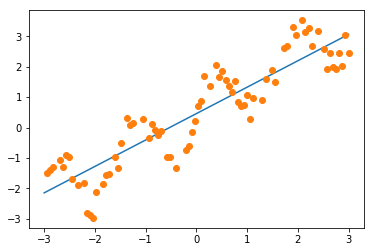

In [9]:
min_pt = X.min() * model.coef_[0] + model.intercept_
max_pt = X.max() * model.coef_[0] + model.intercept_

plt.plot([X.min(), X.max()], [min_pt, max_pt], label='Real data')
plt.plot(X_train, y_train, 'o', label='Fitted line');

Теперь используя обученную модель `model` мы можем предсказать значения для тестовых данных

In [10]:
y_pred_test = model.predict(X_test)

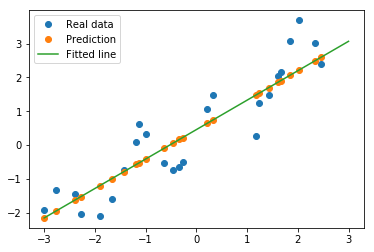

In [11]:
plt.plot(X_test, y_test, 'o', label='Real data')
plt.plot(X_test, y_pred_test, 'o', label='Prediction')
plt.plot([X.min(), X.max()], [min_pt, max_pt], label='Fitted line')
plt.legend(loc='best');

С помощью функции `score()` мы можем оценить качество модели с помощью метрики <a href='https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D0%B4%D0%B5%D1%82%D0%B5%D1%80%D0%BC%D0%B8%D0%BD%D0%B0%D1%86%D0%B8%D0%B8'>коэффициента детерминации</a> R<sup>2</sup>

In [12]:
model.score(X_test, y_test)

0.83219630235949793